<h2 style="color:green" align="center">Aprendizaje Automático con Python:
Regresión Lineal Simple y con Múltiples Variables</h2>

<h3 style="color:purple">Ejemplo de problema para predecir el precio de una vivienda en Monroe, Nueva Jersey (EE. UU.).</h3>

Ejemplo de problema para predecir el precio de una vivienda en Monroe, Nueva Jersey (EE. UU.).
A continuación se muestra una tabla con los precios de casas en Monroe Township, NJ.
Aquí, el precio depende del área (en pies cuadrados), del número de dormitorios y de la antigüedad de la casa (en años).
Dado este conjunto de datos, debemos predecir el precio de nuevas viviendas en función del área, los dormitorios y la antigüedad.

<img src="img/homepricetable.png" style="width:370px;height:250px">


Dado este conjunto de datos, debemos predecir el precio de nuevas viviendas en función del área, los dormitorios y la antigüedad.

---

Queremos calcular el precio de una vivienda que tenga:

* 3000 pies² de área, 3 dormitorios y 40 años de antigüedad
* 2500 pies² de área, 4 dormitorios y 5 años de antigüedad

---

Usaremos **regresión con múltiples variables**.
El precio puede calcularse mediante la siguiente ecuación:





<img src="img/scatterplot.png" style="width:600px;height:370px">

Si representamos los datos con un SCATTERPLOT,
obtenemos la siguiente gráfica en la que
podemos calcular de manera aproximada los
precios de cualquier casa siguiendo este modelo
lineal.

<img src="img/scatterplot2.png" style="width:600px;height:370px">

Pero … qué línea trazamos? Matemáticamente, la que minimice la suma de las
distancias entre los puntos y la línea.

<img src="img/minimizar_suma_distancias.png" >


Debemos saber que una ecuación lineal (recta) viene definida por:

<img src="img/ecuacion_lineal.png" >

* m: Pendiente de la recta
* b: Ordenada en el origen (altura que tiene la recta cuando x=0)

En Python lo llamamos ``coef_`` e ``intercept_``

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('dataset/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000
6,3800,4.0,17,630000
7,2500,3.0,15,590000


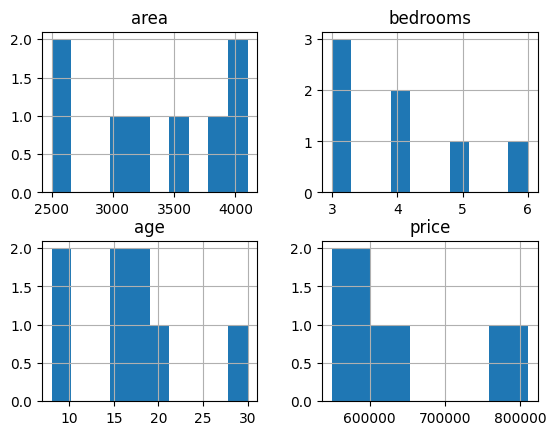

In [4]:
viz = df[['area','bedrooms','age','price']]
viz.hist()
plt.show()

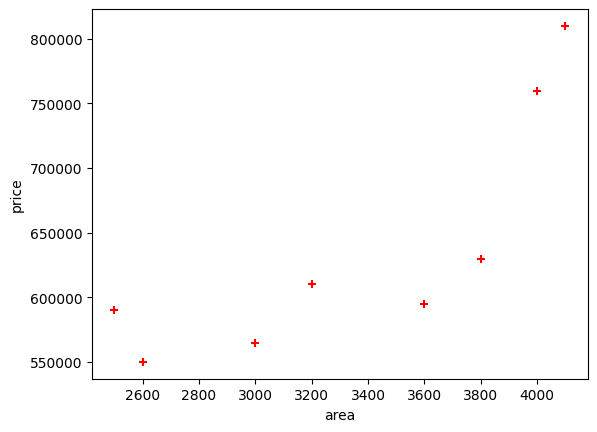

In [5]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [6]:
# Data Preprocessing: Fill NA values with median value of a column
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000
6,3800,4.0,17,630000
7,2500,3.0,15,590000


In [7]:
reg = linear_model.LinearRegression()
reg.fit(df.drop(['price', 'age','bedrooms'],axis='columns'),df.price)

LinearRegression()

In [8]:
reg.coef_

array([123.32089552])

In [9]:
reg.intercept_

np.float64(225625.00000000017)

**Predecir el precio de una casa con un área de 3000 metros cuadrados**

In [10]:
reg.predict([[3000]])

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([595587.68656716])

**Y = m * X + b (m es el coeficiente y b es el intercepto)**

In [11]:
3000*123.32089552 + 225625.00000000017

595587.6865600002

El problema planteado es un poco más complejo que el anterior: Tenemos un listado
de casas con información básica y queremos predecir el precio de estas según el
área, el número de habitaciones y la antigüedad de la casa.
1º) Debemos reemplazar el valor nulo (podemos
hacerlo por la mediana - la media da decimales- )
Podemos analizar los datos y ver el resultado gráfico de cada una de las variables
respecto al precio:

<img src="img/ecuacion_multivariable.png" >

Y adecuada a nuestro ejemplo:

<img src="img/ecuacion_multivariable2.png" >

En el ejemplo, price es la variable dependiente y área, bedrooms y age son las
variables independientes.

In [ ]:
# df.corr()
df.corr(numeric_only=True)["price"].sort_values(ascending=False)


Para la aplicación de algoritmos de machine learning vamos a usar la librería Scikit-
learn (sklearn)
Dentro de esta librería, usaremos el modelo lineal:

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

El modelo lineal tiene los coeficientes de la línea de regresión que hemos hablado
anteriormente. Para conocerlos, podemos acceder a:

In [ ]:
reg.coef_


In [ ]:
reg.intercept_

Con este método (fit) lo que hacemos es entrenar al algoritmo con los valores de x
(área, bedrooms y age) e y (precio)

**Cual es el precio de una casa de 3000 metros cuadrados, 3 dormitorios y de 40 años de antiguedad**


In [ ]:
reg.predict([[3000, 3, 40]])


In [ ]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384


* Cual es el precio de una casa de 2500 metros cuadrados, 4 dormitorios y de 5 años de antiguedad


In [ ]:
reg.predict([[2500, 4, 5]])


<h3 style="color:purple">Generar un fichero CSV con la lista de predicciones de una serie de casas</h3>

In [ ]:
area_df = pd.read_csv("dataset/homes.csv")
area_df.head(3)

In [ ]:
p = reg.predict(area_df)
p

In [ ]:
area_df['prices']=p
area_df

In [ ]:
area_df.to_csv("dataset/prediction.csv")

## 🧩 Práctica: Predicción del Precio de Viviendas con Regresión Lineal Múltiple

### 📘 Objetivos de aprendizaje

Al finalizar esta práctica el alumnado será capaz de:

* Comprender el concepto de **regresión lineal múltiple**.
* Aplicar técnicas de **preprocesamiento de datos** (gestión de valores nulos, escalado, visualización).
* Entrenar un modelo predictivo con **Scikit-learn**.
* Interpretar los coeficientes del modelo.
* Realizar **predicciones** con nuevos datos.

#### 1️⃣ Introducción teórica breve

Explicación guiada del concepto de regresión lineal múltiple:

> La **regresión lineal múltiple** predice un valor continuo (como el precio de una casa) a partir de varias variables independientes, como el tamaño, la ubicación o la antigüedad.
> El modelo sigue la fórmula general:
>
> $
> \hat{y} = b + w_1x_1 + w_2x_2 + \dots + w_nx_n
> $

Donde:

* $ \hat{y} $ = precio estimado
* ($ b $ = intercepto (valor base)
* $ w_i $ = peso o influencia de cada característica
* $ x_i $ = variable independiente

---


#### 2️⃣ Cargar y explorar el dataset Housing.csv


**Tareas:**

* Comprobar si hay valores nulos (`df.isnull().sum()`).
* Verificar el tipo de cada variable (`df.dtypes`).
* Identificar cuáles son numéricas y cuáles categóricas.

#### 3️⃣ Limpieza y preprocesamiento

* Completar valores faltantes con la **mediana** o **moda**.
* Codificar variables categóricas con `pd.get_dummies()` si las hay.
* Comprobar correlaciones con `df.corr()`.
* Normalización (Z-score)

#### 4️⃣ Análisis visual

Crear gráficos para observar relaciones:

#### 5️⃣ Entrenamiento del modelo

#### 6️⃣ Evaluación del modelo

> * ¿Qué significa que el coeficiente de “edad” sea negativo?
> * ¿Qué valor de R² indicarías como “bueno” para este modelo?

#### 7️⃣ Predicción de nuevas viviendas

#### 8️⃣ Visualización del modelo (reto)

Mostrar cómo varía el precio según una variable (manteniendo fijas las demás):
